In [2]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [4]:
print(len(test_images))
print(len(test_labels))


10000
10000


In [5]:

print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

Class Label: 2


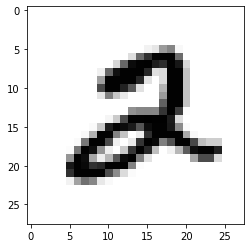

In [7]:
digit=train_images[5]
print("Class Label:",train_labels[5])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Class Label: 3


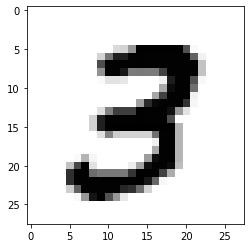

In [8]:
digit=train_images[7]
print("Class Label:",train_labels[7])
#digit.shape

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
import numpy as np
print(train_labels)
print(np.unique(train_labels))

[5 0 4 ... 5 6 8]
[0 1 2 3 4 5 6 7 8 9]


### The network architecture¶

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()


network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

### The compilation step

In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [12]:
train_images.ndim

3

## Preparing the image data

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 #Normalization


test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 #Normalization

### Preparing the labels

In [14]:
train_labels[0]


5

### One-Hot-Encoding

In [15]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Train your Model¶

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 2ms/step - loss: 0.4244 - accuracy: 0.8769
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9668
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0512 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9892


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9782
test_acc: 0.9782000184059143
